In [1]:
from src.helper import get_split_data

In [2]:
X_trn, y_trn, X_val, y_val, X_tst, y_tst = get_split_data.split_data_for_training()

In [3]:
from sklearn import tree

hi_variance = tree.DecisionTreeClassifier(max_depth=None)
hi_variance.fit(X_trn, y_trn)
hi_variance.score(X_tst, y_tst)

0.6

[Text(0.5134328042834774, 0.9772727272727273, 'points_difference <= 1.5\ngini = 0.496\nsamples = 2955\nvalue = [1608, 1347]'),
 Text(0.19732999648311897, 0.9318181818181818, 'rolling_avg_goals_away <= 1.408\ngini = 0.455\nsamples = 1740\nvalue = [1131, 609]'),
 Text(0.3553814003832982, 0.9545454545454546, 'True  '),
 Text(0.037695521838156484, 0.8863636363636364, 'goal_conversion_rate_home <= 0.106\ngini = 0.5\nsamples = 320\nvalue = [164, 156]'),
 Text(0.004287245444801715, 0.8409090909090909, 'aggression_difference <= -16.32\ngini = 0.311\nsamples = 26\nvalue = [5, 21]'),
 Text(0.0021436227224008574, 0.7954545454545454, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.006430868167202572, 0.7954545454545454, 'strength_difference <= -3.2\ngini = 0.219\nsamples = 24\nvalue = [3, 21]'),
 Text(0.004287245444801715, 0.75, 'home_last_team_shoton <= 9.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.0021436227224008574, 0.7045454545454546, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')

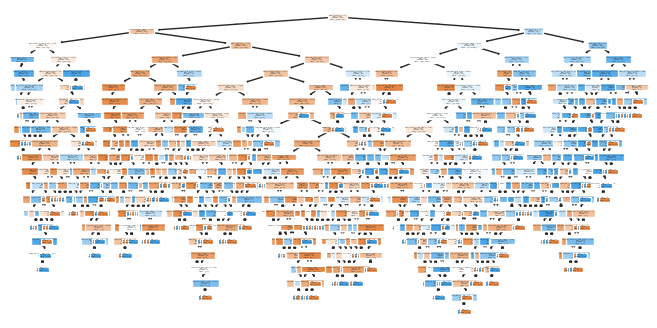

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
features = list(c for c in X_trn.columns)
tree.plot_tree(hi_variance, feature_names=features, filled=True)

[Text(0.5, 0.875, 'points_difference <= 1.5\ngini = 0.496\nsamples = 2955\nvalue = [1608, 1347]\nclass = home_not_win'),
 Text(0.25, 0.625, 'rolling_avg_goals_away <= 1.408\ngini = 0.455\nsamples = 1740\nvalue = [1131, 609]\nclass = home_not_win'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'goal_conversion_rate_home <= 0.106\ngini = 0.5\nsamples = 320\nvalue = [164, 156]\nclass = home_not_win'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'points_difference <= -10.5\ngini = 0.434\nsamples = 1420\nvalue = [967, 453]\nclass = home_not_win'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'points_difference <= 10.5\ngini = 0.477\nsamples = 1215\nvalue = [477, 738]\nclass = home_win'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'rolling_avg_goals_home <= 2.371\ngini = 0.498\nsamples = 717\nvalue = [337.0, 380.0]\nclass = home_win'),
 Text(0.5625, 0.125, '\n  (...)  \n'),


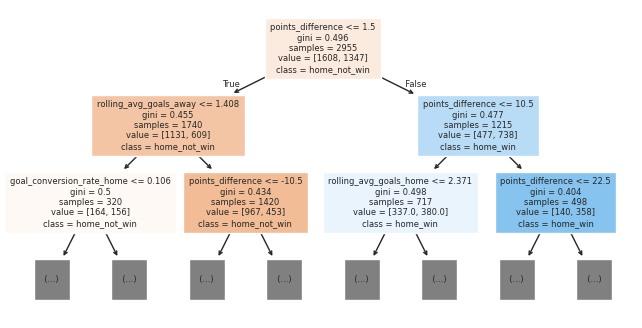

In [5]:
class_names_str = ['home_win' if cls == 1 else 'home_not_win' for cls in hi_variance.classes_]

fig, ax = plt.subplots(figsize=(8, 4))
features = list(c for c in X_trn.columns)
tree.plot_tree(hi_variance, feature_names=features, filled=True,
               class_names=class_names_str,
               max_depth=2, fontsize=6)

Text(0.5, 0, 'max_depth')

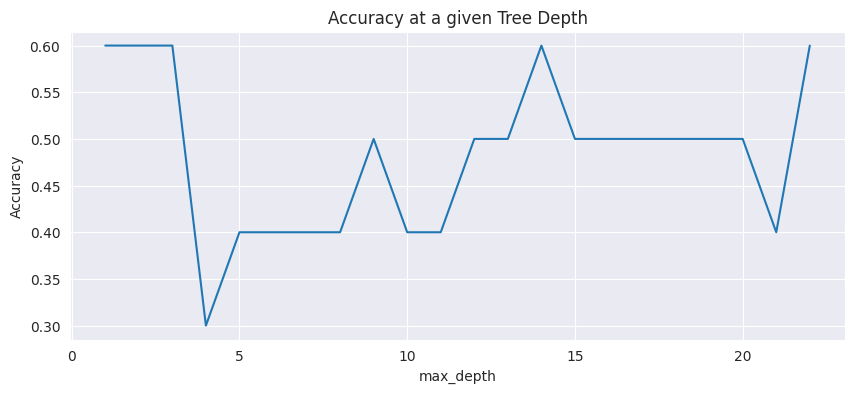

In [6]:
import pandas as pd

accuracies = []
for depth in range(1, 23):
    between = tree.DecisionTreeClassifier(max_depth=depth)
    between.fit(X_trn, y_trn)
    accuracies.append(between.score(X_val, y_val))
fig, ax = plt.subplots(figsize=(10, 4))
(pd.Series(accuracies, name='Accuracy', index=range(1, len(accuracies) + 1))
 .plot(ax=ax, title='Accuracy at a given Tree Depth'))
ax.set_ylabel('Accuracy')
ax.set_xlabel('max_depth')

In [7]:
between = tree.DecisionTreeClassifier(max_depth=13)
between.fit(X_trn, y_trn)
between.score(X_tst, y_tst)

0.6

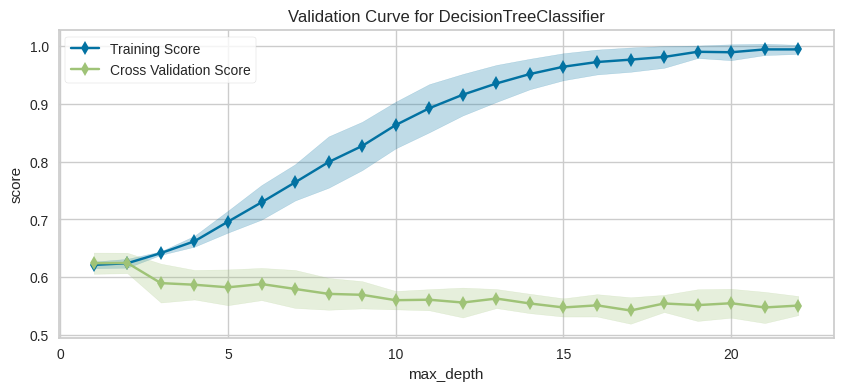

In [8]:
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.model_selection import validation_curve

tscv = TimeSeriesSplit(n_splits=5)

fig, ax = plt.subplots(figsize=(10,4))
viz = validation_curve(tree.DecisionTreeClassifier(),
                       X=pd.concat([X_trn, X_val]),
                       y=pd.concat([y_trn, y_val]),
                       param_name='max_depth', param_range=range(1,23),
                       scoring='accuracy', cv=tscv, ax=ax, n_jobs=6)